<a href="https://colab.research.google.com/github/Maansitomer/Dynamic-sales-Pricing-based-on-Machine-Learning/blob/main/Final_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("Multiclass Clothing Sales Dataset.csv")
df

,Product_Category,Brand,Product_Name,Gender,Size,Color,Season,Payment_Method,Customer_Type,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Sales_Category
0,Traditional Wear,Forever 21,Tops,Women,S,White,Winter,Card,New,1817.433878,816.027585,26.260791,6,42241.692855,294.0,58.0,2.560957,3.106155,29.293331,High Sales
1,Athleisure,Ralph Lauren,Casual Shirt,Men,XXL,Yellow,All-Season,Card,Returning,1672.038198,793.236861,26.882613,8,69318.541482,376.0,40.0,1.590993,3.428439,19.473670,Low Sales
2,Outerwear,Nike,Blazer,Men,S,Green,All-Season,UPI,Returning,1381.568069,890.469629,30.274720,5,56851.121070,48.0,41.0,3.066213,3.765591,22.083407,Medium Sales
3,Athleisure,Zara,Leggings,Women,M,White,Winter,UPI,Returning,859.507388,1497.080062,NaN,4,72084.361720,362.0,32.0,2.194826,4.530297,17.282082,Medium Sales
4,Athleisure,Zara,Dress,Men,XL,Yellow,Summer,Net Banking,Returning,1642.176945,896.187442,NaN,2,29846.082696,34.0,27.0,2.014097,4.644271,9.379608,Medium Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39432,Traditional Wear,GAP,Jumpsuit,Men,XL,Green,All-Season,Net Banking,Returning,1858.848141,1172.847344,0.848040,6,39817.583424,NaN,27.0,0.508260,4.591856,26.741607,High Sales
39433,Traditional Wear,Gucci,Jumpsuit,Women,M,White,Summer,UPI,New,1099.347308,1397.887939,44.747209,4,65546.607443,164.0,29.0,2.391243,4.329654,4.179098,High Sales
39434,Traditional Wear,Louis Vuitton,Tops,Men,M,Black,All-Season,Cash,New,1515.747850,836.598961,19.103334,1,41537.896401,198.0,61.0,3.700131,3.847379,21.688189,High Sales
39435,Tops,GAP,Palazzo,Men,XXL,Red,All-Season,UPI,Returning,1297.913339,1060.711181,31.343386,9,24060.892627,14.0,38.0,1.607467,4.152406,21.718799,Low Sales


## Handle missing values

In [ ]:
df.isnull().sum()

,0
Product_Category,0
Brand,0
Product_Name,0
Gender,0
Size,0
Color,0
Season,0
Payment_Method,0
Customer_Type,0
Selling_Price,1930


In [ ]:
df = df.dropna(subset=["Selling_Price"])
num_cols = ["Discount_Percentage", "Stock_Availability", "Customer_Age", "Store_Rating"]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

<ipython-input-4-d19c37292a4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [ ]:
df.isnull().sum()

,0
Product_Category,0
Brand,0
Product_Name,0
Gender,0
Size,0
Color,0
Season,0
Payment_Method,0
Customer_Type,0
Selling_Price,0


## Encode categorical variables

In [ ]:
cat_cols = ["Product_Category", "Brand", "Gender", "Size", "Color", "Season",
            "Payment_Method", "Customer_Type", "Sales_Category"]

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


<ipython-input-6-cb10c030e893>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
<ipython-input-6-cb10c030e893>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
<ipython-input-6-cb10c030e893>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
df.head()

,Product_Category,Brand,Product_Name,Gender,Size,Color,Season,Payment_Method,Customer_Type,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Sales_Category
0,4,4,Tops,1,2,7,2,0,0,1817.433878,816.027585,26.260791,6,42241.692855,294.0,58.0,2.560957,3.106155,29.293331,0
1,0,12,Casual Shirt,0,4,8,0,0,1,1672.038198,793.236861,26.882613,8,69318.541482,376.0,40.0,1.590993,3.428439,19.473670,1
2,2,10,Blazer,0,2,2,0,3,1,1381.568069,890.469629,30.274720,5,56851.121070,48.0,41.0,3.066213,3.765591,22.083407,2
3,0,19,Leggings,1,1,7,2,3,1,859.507388,1497.080062,25.216024,4,72084.361720,362.0,32.0,2.194826,4.530297,17.282082,2
4,0,19,Dress,0,3,8,1,2,1,1642.176945,896.187442,25.216024,2,29846.082696,34.0,27.0,2.014097,4.644271,9.379608,2


## check for outliers

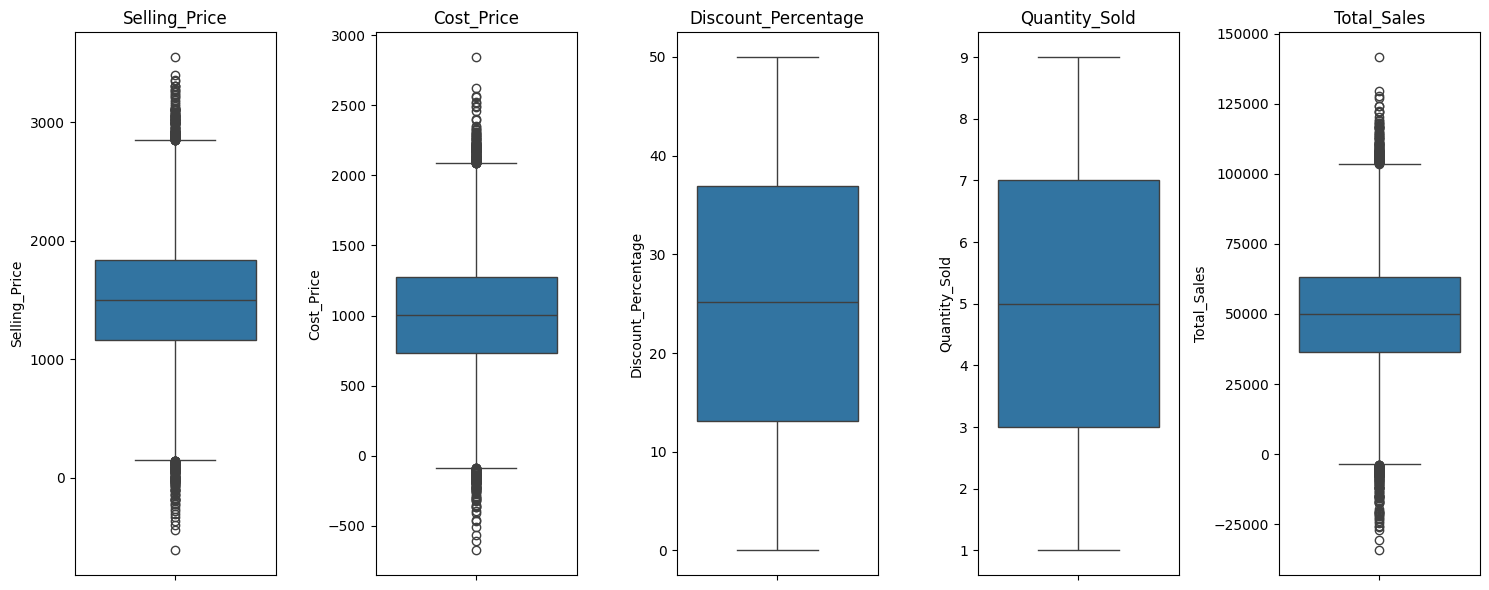

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Selling_Price", "Cost_Price", "Discount_Percentage", "Quantity_Sold", "Total_Sales"]

plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
z_scores = np.abs(zscore(df[num_cols]))
outliers_z = (z_scores > 3).sum()
print("Outliers detected using Z-Score method:\n", outliers_z)

Outliers detected using Z-Score method:
 Selling_Price          109
Cost_Price              97
Discount_Percentage      0
Quantity_Sold            0
Total_Sales             96
dtype: int64


In [ ]:
df = df[(z_scores < 3).all(axis=1)]

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[num_cols] = df[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)


<ipython-input-10-e8845c667c35>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)


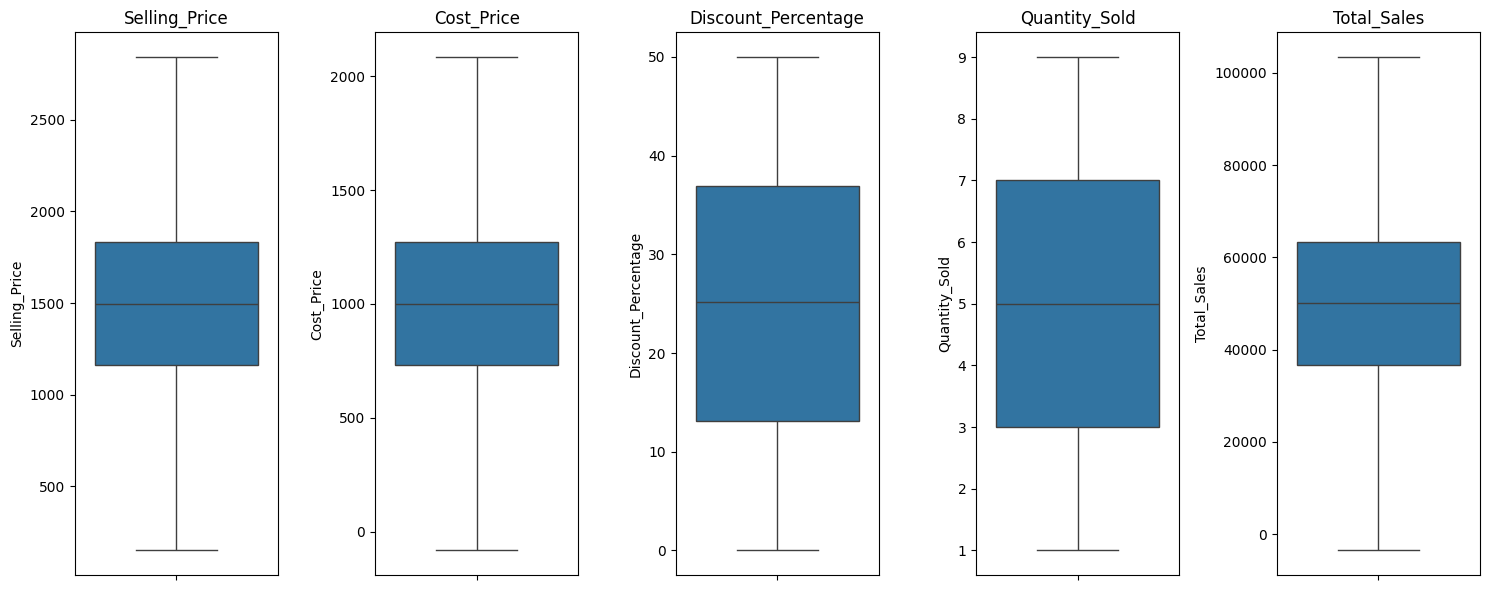

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Selling_Price", "Cost_Price", "Discount_Percentage", "Quantity_Sold", "Total_Sales"]

# Plot boxplots for each numerical feature
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Distribution of Key Features

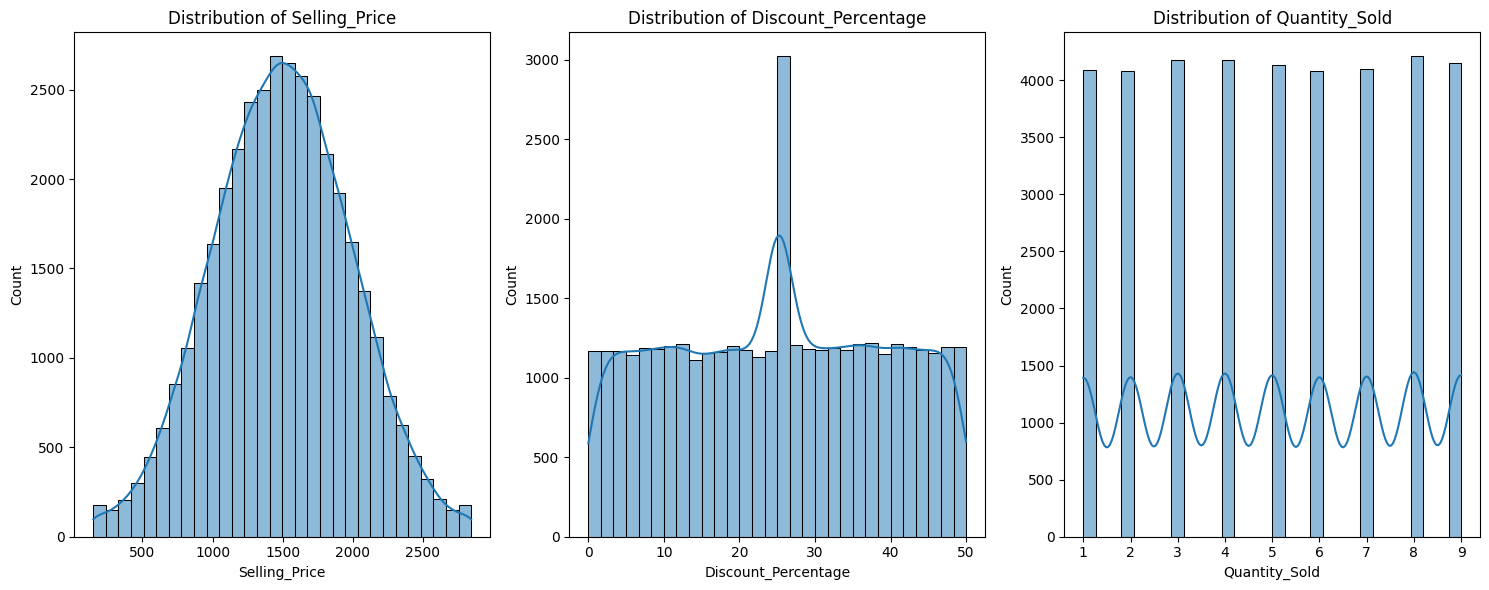

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
for i, col in enumerate(["Selling_Price", "Discount_Percentage", "Quantity_Sold"]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


## Sales Trends Analysis

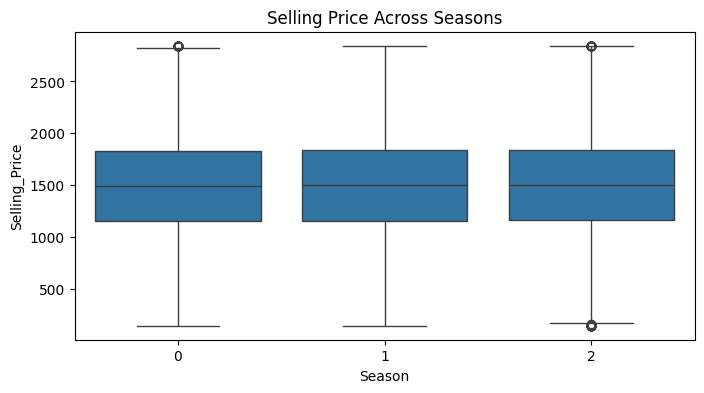

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Season", y="Selling_Price", data=df)
plt.title("Selling Price Across Seasons")
plt.show()

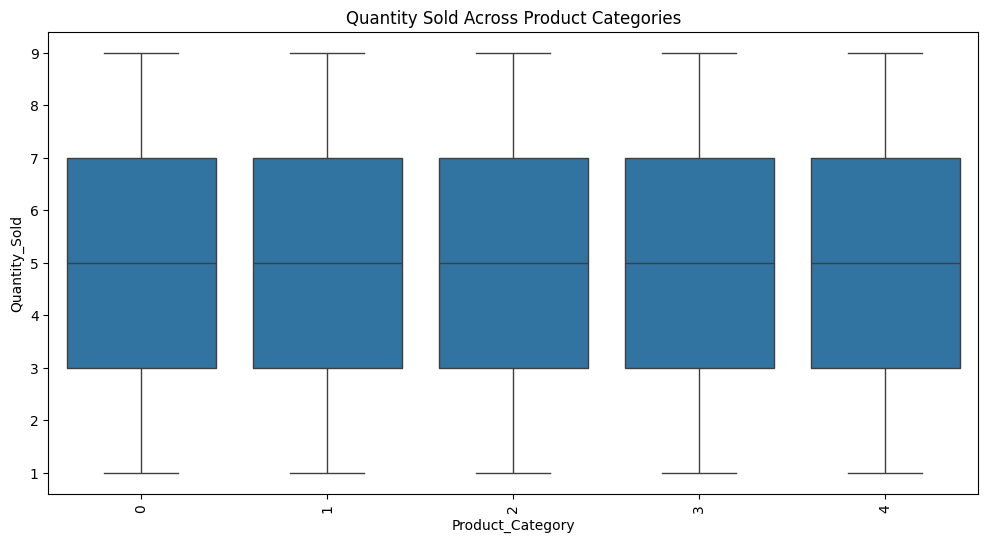

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Product_Category", y="Quantity_Sold", data=df)
plt.xticks(rotation=90)
plt.title("Quantity Sold Across Product Categories")
plt.show()

## Feature Engineering

In [ ]:
df["Demand_Index"] = df["Quantity_Sold"] / (df["Stock_Availability"] + 1)  # Avoid division by zero
df["Price_Elasticity"] = df["Discount_Percentage"] * df["Quantity_Sold"]
df["Profit_Margin"] = (df["Selling_Price"] - df["Cost_Price"]) / df["Selling_Price"]

## Select features and target

In [ ]:
X = df.drop(columns=["Selling_Price", "Product_Name"])
y = df["Selling_Price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure only numerical columns present in X_train are scaled
num_cols = [col for col in num_cols if col in X_train.columns]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



In [ ]:
X.head()

,Product_Category,Brand,Gender,Size,Color,Season,Payment_Method,Customer_Type,Cost_Price,Discount_Percentage,...,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Sales_Category,Demand_Index,Price_Elasticity,Profit_Margin
0,4,4,1,2,7,2,0,0,816.027585,26.260791,...,42241.692855,294.0,58.0,2.560957,3.106155,29.293331,0,0.020339,157.564746,0.551000
1,0,12,0,4,8,0,0,1,793.236861,26.882613,...,69318.541482,376.0,40.0,1.590993,3.428439,19.473670,1,0.021220,215.060906,0.525587
2,2,10,0,2,2,0,3,1,890.469629,30.274720,...,56851.121070,48.0,41.0,3.066213,3.765591,22.083407,2,0.102041,151.373600,0.355465
3,0,19,1,1,7,2,3,1,1497.080062,25.216024,...,72084.361720,362.0,32.0,2.194826,4.530297,17.282082,2,0.011019,100.864097,-0.741788
4,0,19,0,3,8,1,2,1,896.187442,25.216024,...,29846.082696,34.0,27.0,2.014097,4.644271,9.379608,2,0.057143,50.432048,0.454269


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Evaluate models
rf_mae, rf_rmse, rf_r2 = evaluate_model(rf, X_test, y_test)
gb_mae, gb_rmse, gb_r2 = evaluate_model(gb, X_test, y_test)

In [ ]:
y.head()

,Selling_Price
0,1817.433878
1,1672.038198
2,1381.568069
3,859.507388
4,1642.176945


## XGBoost Model

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)

important_features = feature_importance.head(15)["Feature"].tolist()
X_train = X_train[important_features]
X_test = X_test[important_features]


                Feature  Importance
20        Profit_Margin    0.568661
8            Cost_Price    0.290345
18         Demand_Index    0.015520
14   Purchase_Frequency    0.012088
16          Return_Rate    0.011566
10        Quantity_Sold    0.009905
12   Stock_Availability    0.009374
13         Customer_Age    0.007958
19     Price_Elasticity    0.007771
15         Store_Rating    0.007262
11          Total_Sales    0.006954
1                 Brand    0.006238
3                  Size    0.006144
7         Customer_Type    0.005643
17       Sales_Category    0.005571
9   Discount_Percentage    0.005429
5                Season    0.005398
6        Payment_Method    0.005021
2                Gender    0.004732
4                 Color    0.004566
0      Product_Category    0.003856


## Hyperparameter Tuning

In [ ]:
param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [6, 8, 10],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring="r2", cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

mae_opt = mean_absolute_error(y_test, y_pred_optimized)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
r2_opt = r2_score(y_test, y_pred_optimized)

print("\n Optimized Model Performance")
print(f"MAE: {mae_opt:.2f}")
print(f"RMSE: {rmse_opt:.2f}")
print(f"R² Score: {r2_opt:.2f}")
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
print("\n Model Performance Comparison ")
print(f"XGBoost - MAE: {mae_opt:.2f}, RMSE: {rmse_opt:.2f}, R²: {r2_opt:.2f}")
print(f"Random Forest - MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")
print(f"Gradient Boosting - MAE: {gb_mae:.2f}, RMSE: {gb_rmse:.2f}, R²: {gb_r2:.2f}")

## simulate dynamic pricing

In [ ]:
def simulate_dynamic_pricing(model, X_test, base_price, discount_range):
    simulations = []
    for discount in discount_range:
        X_test["Discount_Percentage"] = discount
        predicted_prices = model.predict(X_test)
        simulations.append((discount, predicted_prices.mean()))
    return simulations

discount_range = np.arange(0, 50, 5)  # Discount from 0% to 50%
simulation_results = simulate_dynamic_pricing(best_model, X_test.copy(), y_test, discount_range)

#  Plot Simulation Results
plt.figure(figsize=(10, 5))
plt.plot([x[0] for x in simulation_results], [x[1] for x in simulation_results], marker='o', linestyle='-')
plt.xlabel("Discount Percentage")
plt.ylabel("Predicted Selling Price")
plt.title("Impact of Discounts on Predicted Selling Price")
plt.grid()
plt.show()
